# Punto 1-2
La substraccion esta metida por ahi

C:\Users\Franco\Desktop\Facu\IB\Imagenes_medicas\P2\p12
img.size:  39277
img.size:  39277
Size of image: (217, 181)
Intensity Min: 0   Max:255
Number of Levels: 256


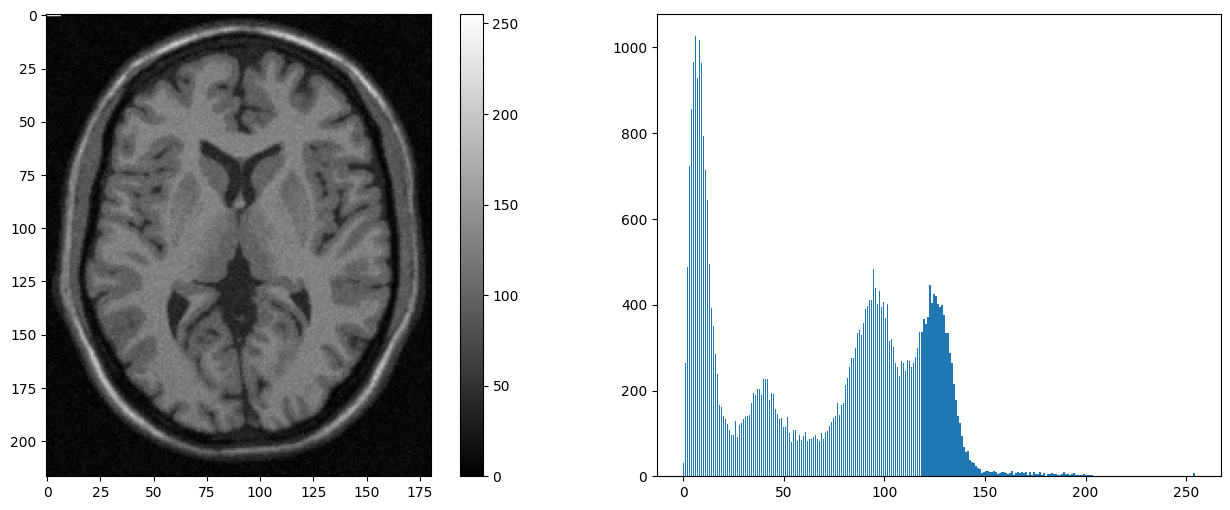

In [ ]:
import cv2
import sys 
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import os.path

os.chdir(r"C:/Users/Franco/Desktop/Facu/IB/Imagenes_medicas/P2/p12")

path=os.getcwd()
print(path)

def read_pgm_file(file_name):

    data_dir = r"C:/Users/Franco/Desktop/Facu/IB/Imagenes_medicas/P2/p12"

    # Test if file exists
    file_path = os.path.join(data_dir, file_name)
    assert os.path.isfile(file_path), 'file \'{0}\' does not exist'.format(file_path)

    img = cv2.imread(file_name,flags=cv2.IMREAD_GRAYSCALE)

    if img is not None:
        print('img.size: ', img.size)
    else:
        print('imread({0}) -> None'.format(file_path))

    return img

#Aca voy a cargar la imagen original como var globar porque la voy a usar un monton.
imagen_original = read_pgm_file("ImagenA.pgm")

def sustract(img2):
    img1= np.array(imagen_original, dtype =np.int16)
    img2 = np.array(img2, dtype =np.int16)
    if img1.shape != img2.shape:
        print("Error: Las imágenes tienen tamaños diferentes y no se pueden restar")
        return None
    
    # Realizar la resta con NumPy
    resultado = img1- img2
    

    # Normalizar valores para mantenerlos entre 0 y 255
    #resultado = np.abs(resultado)
    resultado = np.clip(resultado, 0, 255).astype(np.uint8)
    return resultado



def show_img_hist(im, name, mostrar = False):
    
    vmin = np.amin(im)
    vmax = np.max(im)
    print("Intensity Min: {}   Max:{}".format(vmin,vmax))

    L = 256
    print("Number of Levels: {}".format(L))
    fig = plt.figure(figsize=(16,6))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    # imgplot = plt.imshow(im/np.amax(im))
    imgplot = ax1.imshow(im,cmap='gray', vmin=vmin, vmax=vmax)
    fig.colorbar(imgplot, ax=ax1)
    # cv2.imshow(infile,img)
    # cv2.waitKey(0)

    hist, bin_edges = np.histogram(im.ravel(),bins=L)
    ax2.bar(bin_edges[:-1], hist)
    #ax2.set_xlim(0,255)
    plt.savefig(path+f'/{name}.png')
    plt.show()
    #Guarda los datos
    np.savetxt(f"{name}_raw.csv", np.column_stack((bin_edges[:-1], hist)), delimiter=",")

    if mostrar:
        return hist


img = imagen_original

im = np.array(img)
print("Size of image: {}".format(im.shape))

histograma = show_img_hist(im,"ImgA_orig", True) #obtengo el histograma




Procesamiento semilineal:

img.size:  39277
Intensity Min: 0   Max:255
Number of Levels: 256


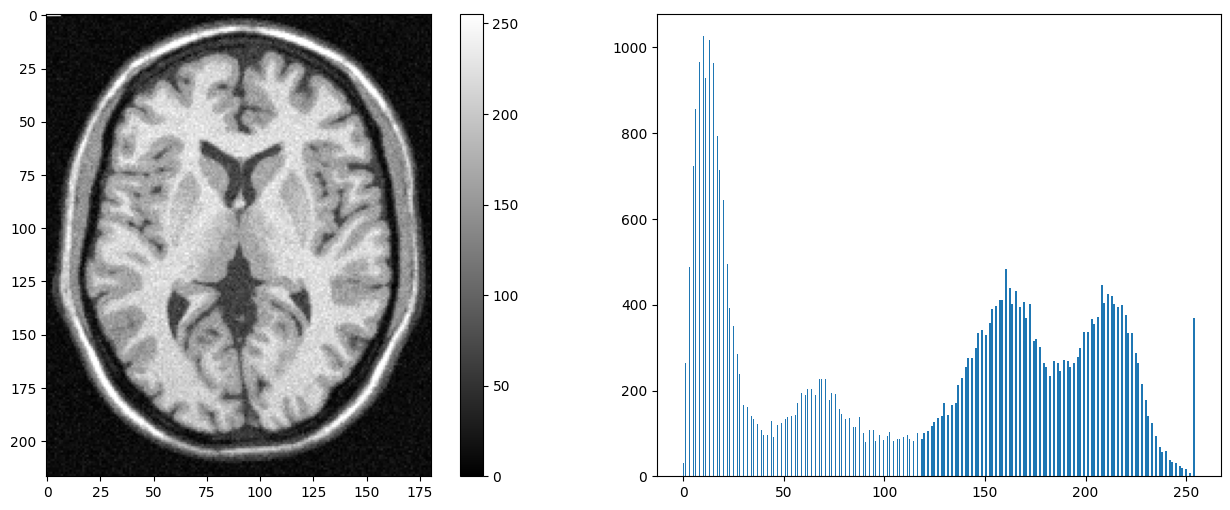

img.size:  39277
Intensity Min: 0   Max:105
Number of Levels: 256


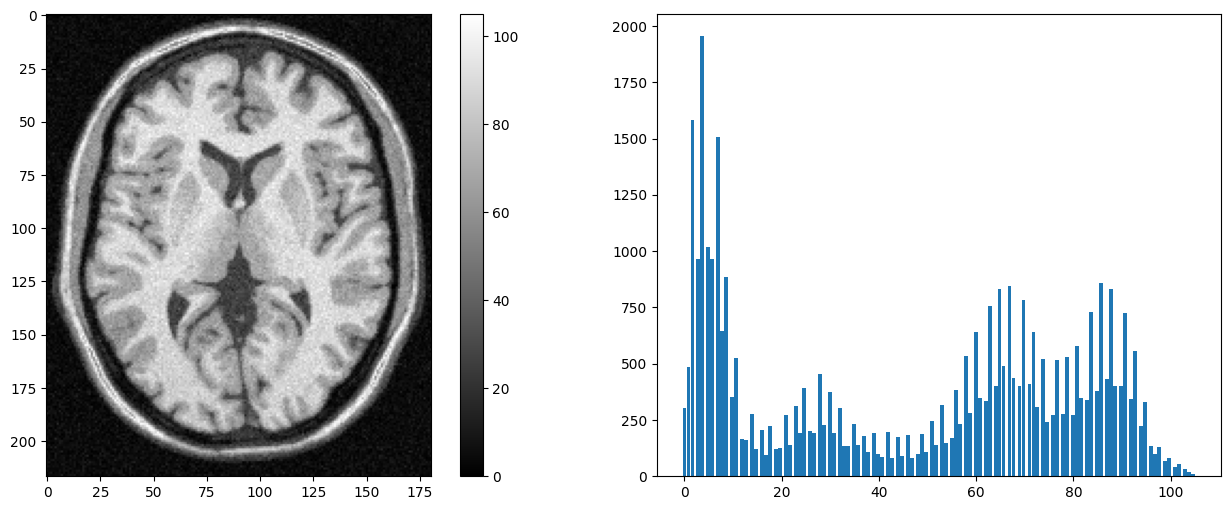

In [ ]:

def T(p):
    if p>150:
        return 255
    if p<0:
        return 0
    else:
        return 255*((p-0)/(150-0))
def process_pgm_file(im):
    
    imout = np.zeros_like(im)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            imout[i][j]= T(im[i][j])
    return imout

imout_semilineal = process_pgm_file(im)
cv2.imwrite("ImgA_out_semilin.pgm",imout_semilineal,[cv2.IMWRITE_PXM_BINARY,0])
img_semilineal = read_pgm_file("ImgA_out_semilin.pgm")
show_img_hist(img_semilineal,"ImgA_out_semilin")


#Parte de la substraicción:
im_subs_semilineal = sustract(img_semilineal)
cv2.imwrite("ImgA_subs_semilin.pgm",im_subs_semilineal,[cv2.IMWRITE_PXM_BINARY,0])
img_subs_semilineal = read_pgm_file("ImgA_subs_semilin.pgm")
show_img_hist(img_subs_semilineal,"ImgA_subs_semilin")


Esta seria la de ecualización:

img.size:  39277
img.size:  39277
Intensity Min: 0   Max:254
Number of Levels: 256


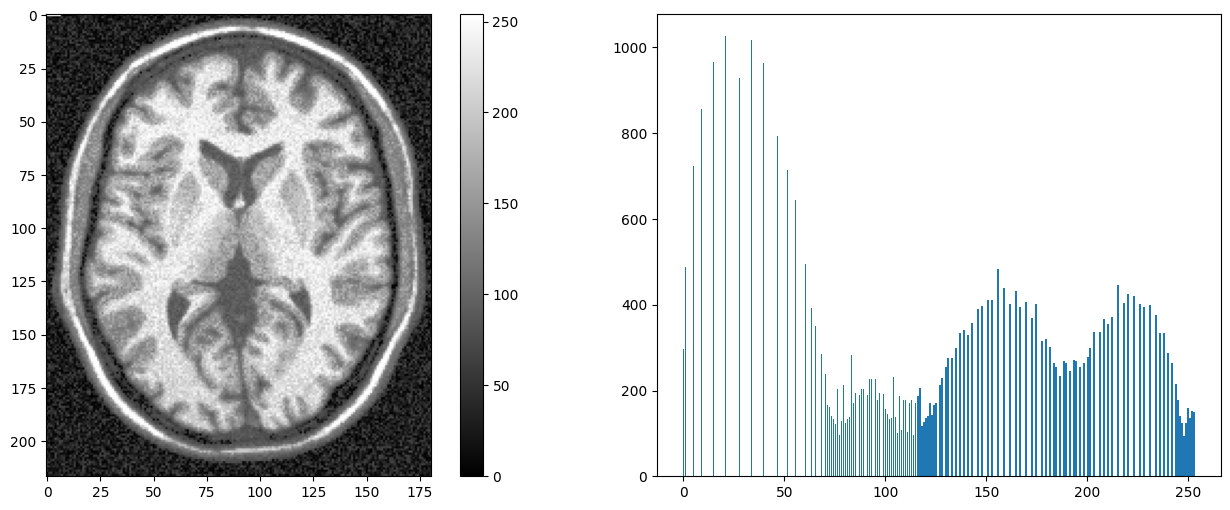

img.size:  39277
Intensity Min: 0   Max:110
Number of Levels: 256


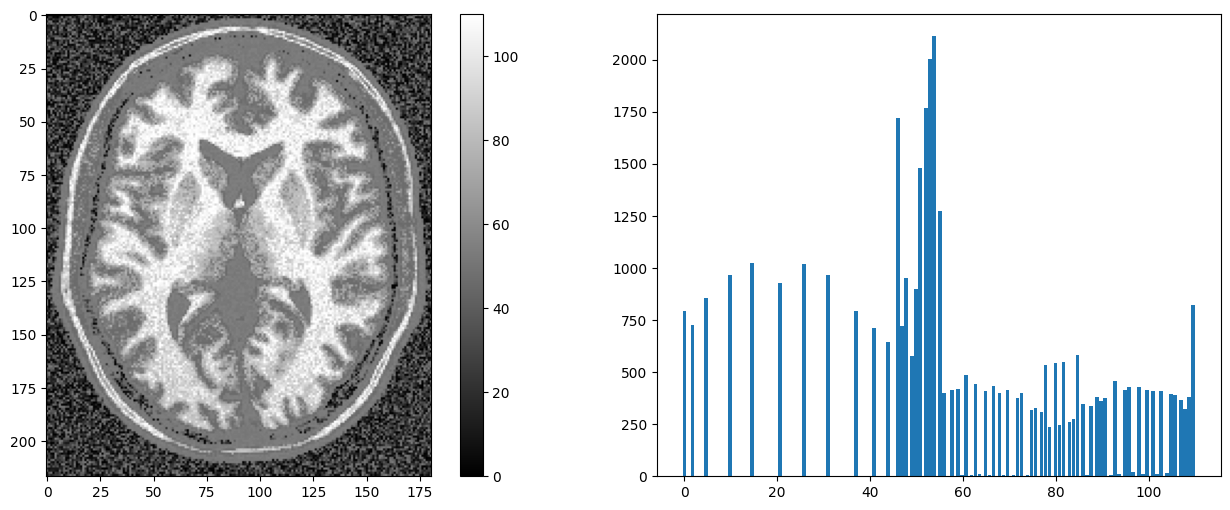

In [ ]:
nam = "ImgA_out_eq"
img = read_pgm_file("ImagenA.pgm")

def C(r,hist,nmax):
    return np.sum(hist[:r])/nmax
    

def process_eq(img,hist):
    imout = np.zeros_like(img)
    img_size = img.shape[0]*img.shape[1]
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            imout[i][j] = 255*C(img[i][j],hist,img_size)
    return imout

imout_eq = process_eq(im,histograma)
cv2.imwrite(f"{nam}.pgm",imout_eq,[cv2.IMWRITE_PXM_BINARY,0])
img_eq = read_pgm_file(f"{nam}.pgm")
show_img_hist(img_eq,nam)

#Parte de la substraicción:
im_subs_eq = sustract(img_eq)
cv2.imwrite("ImgA_subs_eq.pgm",im_subs_eq,[cv2.IMWRITE_PXM_BINARY,0])
img_subs_eq = read_pgm_file("ImgA_subs_eq.pgm")
show_img_hist(img_subs_eq,"ImgA_subs_eq")

Esta es la de s = T(r) con 

s=1 si  0< r < 128;

s=0 si r > 128

Label 2c1

img.size:  39277
Intensity Min: 0   Max:255
Number of Levels: 256


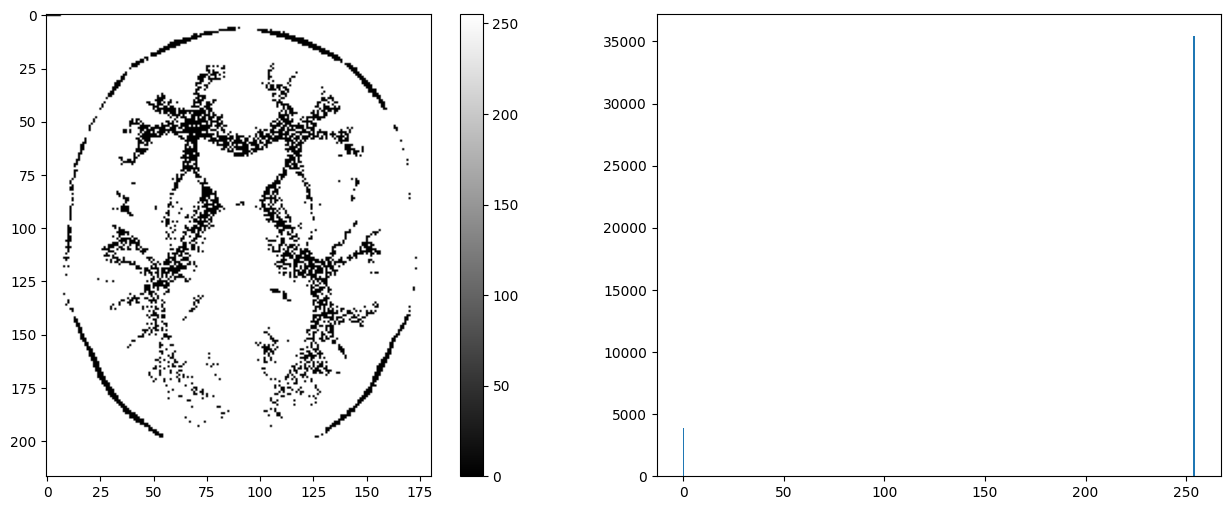

img.size:  39277
Intensity Min: 0   Max:255
Number of Levels: 256


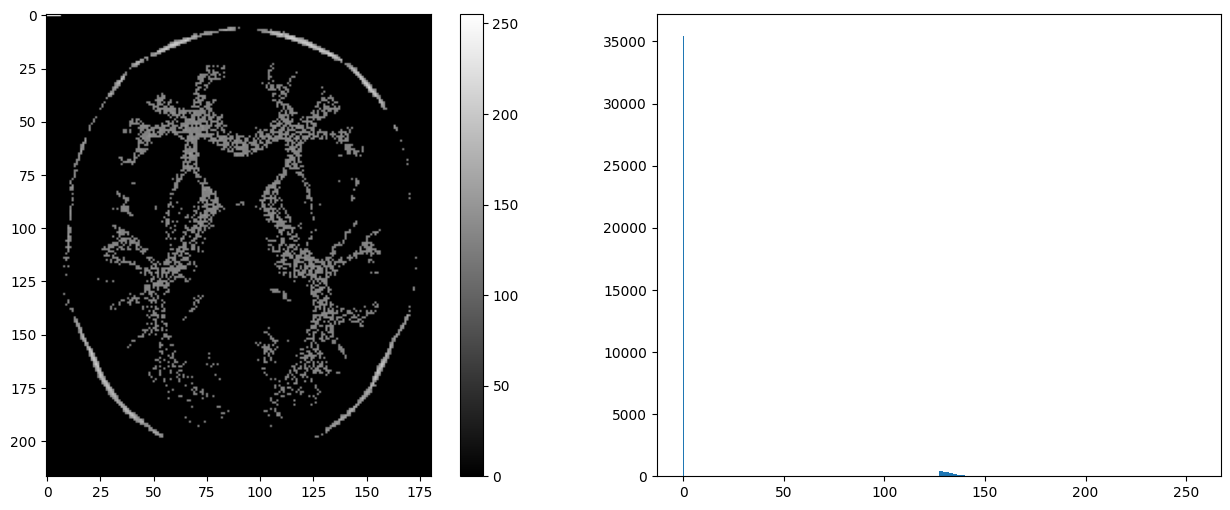

Intensity Min: 0   Max:255
Number of Levels: 256


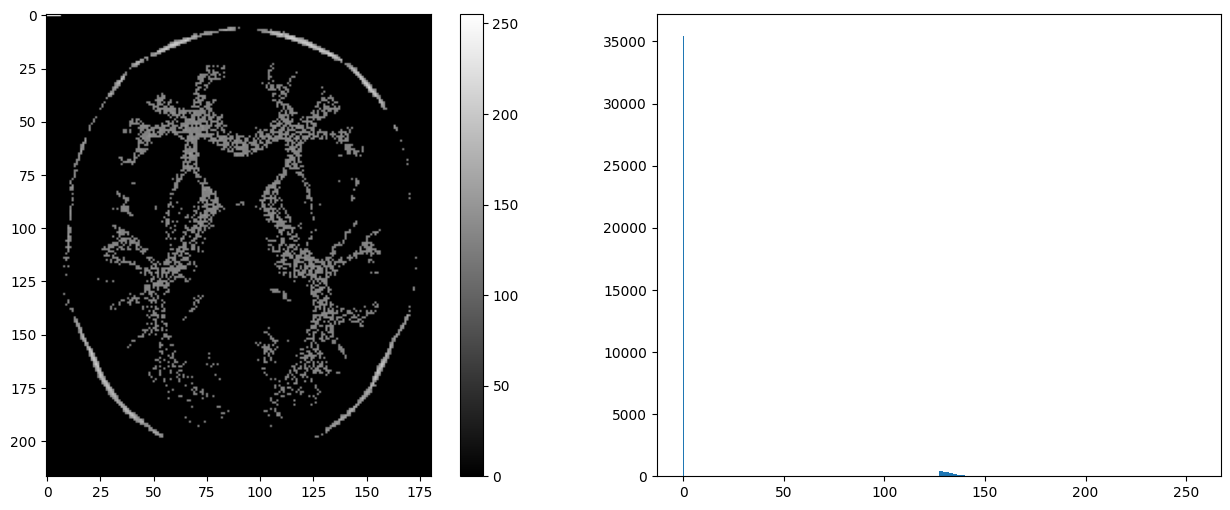

In [ ]:
nam = "ImgA_out_2c1"

def T(r):
    if r>=128:
        return 0
    else:
        return 255

def process(img):
    imout = np.zeros_like(img)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            imout[i][j] = T(img[i][j])
    return imout

imout_2c1 = process(im)
cv2.imwrite(f"{nam}.pgm",imout_2c1,[cv2.IMWRITE_PXM_BINARY,0])
img_2c1 = read_pgm_file(f"{nam}.pgm")
show_img_hist(img,nam)

# #Parte de la substraicción:
im_subs_2c1 = sustract(img_2c1)
cv2.imwrite(f"ImgA_subs_2c1.pgm",im_subs_2c1,[cv2.IMWRITE_PXM_BINARY,0])
img_subs_2c1 = read_pgm_file(f"ImgA_subs_2c1.pgm")
show_img_hist(img_subs_2c1,f"ImgA_subs_2c1")

Ahora s = c*r^{\gamma}

img.size:  39277
Intensity Min: 0   Max:255
Number of Levels: 256


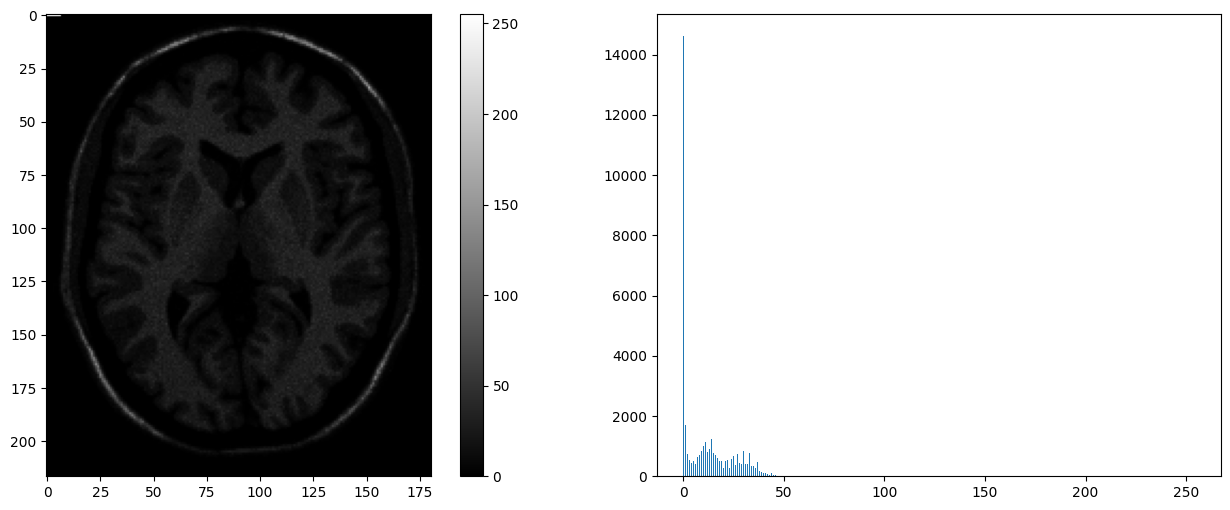

img.size:  39277
Intensity Min: 0   Max:99
Number of Levels: 256


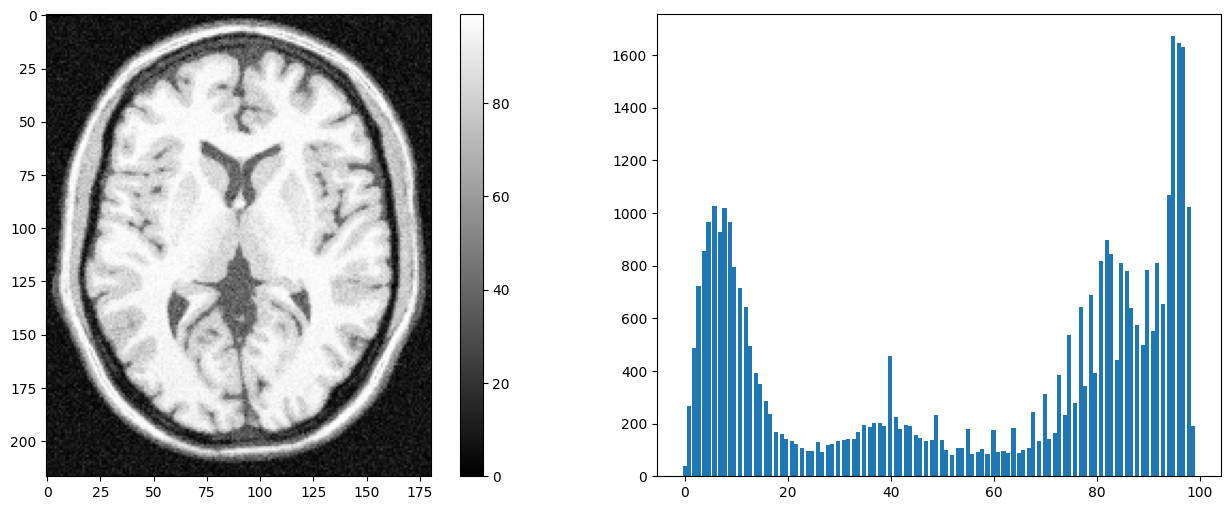

img.size:  39277
Intensity Min: 0   Max:255
Number of Levels: 256


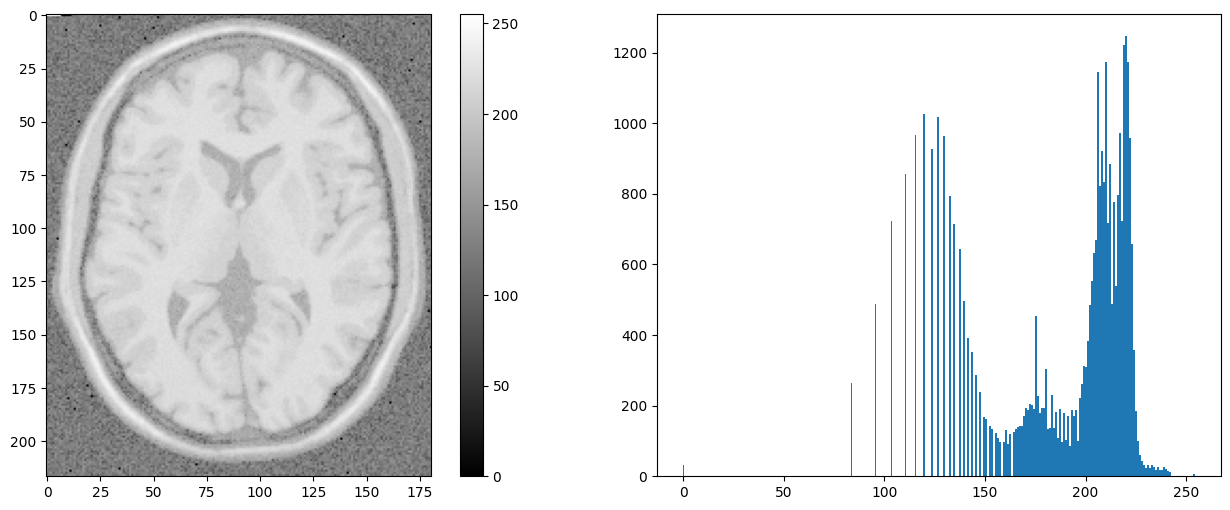

img.size:  39277
Intensity Min: 0   Max:0
Number of Levels: 256


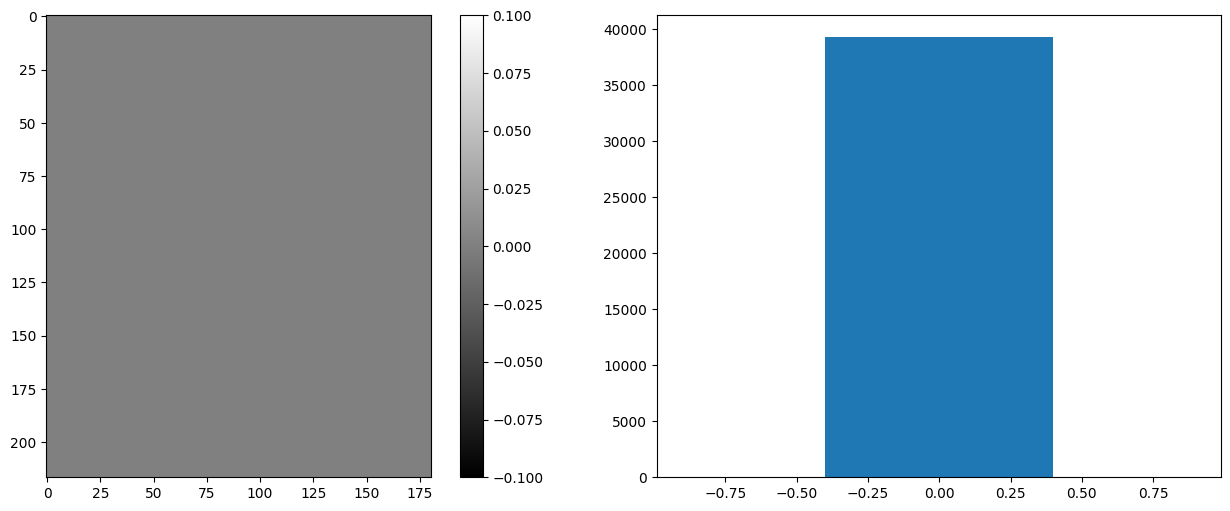

In [ ]:
nam = "ImgA_out_gamma"

def T(r, gamma):
    return (r/255)**(gamma)

def process(img,gamma):
    imout = np.zeros_like(img)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            imout[i][j] = 255*T(img[i][j],gamma)
    return imout

g1= 3
#gamma  > 1
imout_g1 = process(im,g1)
cv2.imwrite(f"{nam}_{g1}.pgm",imout_g1,[cv2.IMWRITE_PXM_BINARY,0])
img_g1 = read_pgm_file(f"{nam}_{g1}.pgm")
show_img_hist(img_g1,f"{nam}_{g1}")

#Parte de la substraicción:
im_subs_g1 = sustract(img_g1)
cv2.imwrite(f"ImgA_subs_gamma_3.pgm",im_subs,[cv2.IMWRITE_PXM_BINARY,0])
img_subs_g1 = read_pgm_file(f"ImgA_subs_gamma_3.pgm")
show_img_hist(img_subs_g1,f"ImgA_subs_gamma_3")


g2 = 0.2
#gamma  < 1
imout_g2 = process(im,g2)
cv2.imwrite(f"{nam}_{g2}.pgm",imout_g2,[cv2.IMWRITE_PXM_BINARY,0])
img_g2 = read_pgm_file(f"{nam}_{g2}.pgm")
show_img_hist(img_g2,f"{nam}_{g2}")

#Parte de la substraicción:
im_subs_g2 = sustract(img_g2)
cv2.imwrite(f"ImgA_subs_gamma_0.2.pgm",im_subs_g2,[cv2.IMWRITE_PXM_BINARY,0])
img_subs_g2 = read_pgm_file(f"ImgA_subs_gamma_0.2.pgm")
show_img_hist(img_subs_g2,f"ImgA_subs_gamma_0.2")


# Punto 3


Reescalear tamaño de imagenes

## Vecino mas cercano

In [ ]:
import cv2
import sys 
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import os.path

os.chdir(r"C:/Users/Franco/Desktop/Facu/IB/Imagenes_medicas/P2/p3")

path=os.getcwd()
print(path)

def read_pgm_file(file_name):

    data_dir = r"C:/Users/Franco/Desktop/Facu/IB/Imagenes_medicas/P2/p3"

    # Test if file exists
    file_path = os.path.join(data_dir, file_name)
    assert os.path.isfile(file_path), 'file \'{0}\' does not exist'.format(file_path)

    img = cv2.imread(file_name,flags=cv2.IMREAD_GRAYSCALE)

    if img is not None:
        print('img.size: ', img.size)
    else:
        print('imread({0}) -> None'.format(file_path))

    return img

def show_img_hist(im, name, mostrar = False):
    
    vmin = np.amin(im)
    vmax = np.max(im)
    print("Intensity Min: {}   Max:{}".format(vmin,vmax))

    L = 256
    print("Number of Levels: {}".format(L))
    fig = plt.figure(figsize=(16,6))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    # imgplot = plt.imshow(im/np.amax(im))
    imgplot = ax1.imshow(im,cmap='gray', vmin=vmin, vmax=vmax)
    fig.colorbar(imgplot, ax=ax1)
    # cv2.imshow(infile,img)
    # cv2.waitKey(0)

    hist, bin_edges = np.histogram(im.ravel(),bins=L)
    ax2.bar(bin_edges[:-1], hist)
    #ax2.set_xlim(0,255)
    plt.savefig(path+f'/{name}.png')
    plt.show()
    #Guarda los datos
    np.savetxt(f"{name}_raw.csv", np.column_stack((bin_edges[:-1], hist)), delimiter=",")

    if mostrar:
        return hist


img_c = read_pgm_file("ImagenC.pgm")

x = 8 #Factor de reescaleo


nuevo_ancho = int(img_c.shape[1] * x)
nuevo_alto = int(img_c.shape[0] * x)

# Reescalar la imagen utilizando la interpolación del vecino más cercano
imagen_reescalada = cv2.resize(img_c, (nuevo_ancho, nuevo_alto), interpolation=cv2.INTER_NEAREST)

# # Mostrar la imagen original y reescalada
cv2.imshow("Imagen Original", img_c)
cv2.imwrite("Ic_original.png", img_c)

cv2.imshow("Imagen Reescalada", imagen_reescalada)

# Guardar las imágenes
cv2.imwrite("Ic_pvecinos.pgm", imagen_reescalada)
cv2.imwrite("Ic_pvecinos.png", imagen_reescalada)

# im=np.array(img)
# im2=np.array(imagen_reescalada)


# Esperar hasta que se cierre la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()




C:\Users\Franco\Desktop\Facu\IB\Imagenes_medicas\P2\p3
img.size:  16384


## Interpolacion bilineal

In [ ]:

img = read_pgm_file("ImagenC.pgm")

x = 8 #Factor de reescaleo


nuevo_ancho = int(img.shape[1] * x)
nuevo_alto = int(img.shape[0] * x)

# Reescalar la imagen utilizando la interpolación del vecino más cercano
imagen_reescalada = cv2.resize(img, (nuevo_ancho, nuevo_alto), interpolation=cv2.INTER_LINEAR)

# # Mostrar la imagen original y reescalada
cv2.imshow("Imagen Original", img)
cv2.imshow("Imagen Reescalada", imagen_reescalada)


# Guardar las imágenes
cv2.imwrite("Ic_pbilinear.pgm", imagen_reescalada)
cv2.imwrite("Ic_pbilinear.png", imagen_reescalada)
im=np.array(img)
im2=np.array(imagen_reescalada)


# Esperar hasta que se cierre la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()


img.size:  16384


## Interpolacioon bicubica

In [21]:

img = read_pgm_file("ImagenC.pgm")

x = 8 #Factor de reescaleo


nuevo_ancho = int(img.shape[1] * x)
nuevo_alto = int(img.shape[0] * x)

# Reescalar la imagen utilizando la interpolación del vecino más cercano
imagen_reescalada = cv2.resize(img, (nuevo_ancho, nuevo_alto), interpolation=cv2.INTER_CUBIC)

# # Mostrar la imagen original y reescalada
cv2.imshow("Imagen Original", img)
cv2.imshow("Imagen Reescalada", imagen_reescalada)


# Guardar las imágenes
cv2.imwrite("Ic_pbicubic.pgm", imagen_reescalada)
cv2.imwrite("Ic_pbicubic.png", imagen_reescalada)
im=np.array(img)
im2=np.array(imagen_reescalada)


# Esperar hasta que se cierre la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()


img.size:  16384


# Punto 4

Este lo hago usando imageJ..

Parece que le pasabajos es simplemente el blur o promedio.

# Puso 5
Tambien lo hago con imageJ :))

# Punto 6



## Ruido gaussiano

La idea es cargar la imagen con el código de arriba, despues definir función de ruido  Img = Img_orig + N(mu, sigma) y mostrarla.

In [ ]:
img_entrada = orig

os.chdir(r"C:/Users/Franco/Desktop/Facu/IB/Imagenes_medicas/P2/p6")
def add_noise(img, mu, sigma):
    img_out = img.astype(np.float32)
    ruido = np.random.normal(mu,sigma,img.shape)
    img_out += ruido
    
    #Aca saturamos en los extrenos para quedarnos en el rango
    img_out = np.clip(img_out, 0,255)
    
    return img_out.astype(np.uint8)

img_ruido = add_noise(img_entrada, 0 ,25)
cv2.imwrite("ImgA_gaussnoise.png", img_ruido)
cv2.imwrite("ImgA_gaussnoise.pgm", img_ruido)
# Mostrar imágenes
cv2.imshow("Original", img_entrada)
cv2.imshow("Con Ruido Gaussiano", img_ruido)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ahora quiere que intente mejorar la imagen aplicandole algunos filtros raros

Esto lo hice con ImageJ porque era mas amigable para todas esas cosas. (En realidad hice solo el lowpass y el de unsharped mask)

### High boost
Lo mismo, la idea es cargar el archivo, definir una funcion que se encargue de hacer eso. Si no entendí mal, img_out = img_in + (B*img_in - img_blur); B es una coonstante que ....  y img_blur es la imagen desenfocada ( o con un pasabajos)

In [ ]:

img_entrada = orig

os.chdir(r"C:/Users/Franco/Desktop/Facu/IB/Imagenes_medicas/P2/p6")

import cv2

def high_boost_filter(image, boost_factor):
    # Convertir imagen a escala de grises
    gray = image
    
    # Aplicar un desenfoque gaussiano para obtener la versión suavizada
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)  # Kernel 3x3
    
    # Crear la máscara de alta frecuencia (imagen original - desenfoque)
    mask = gray.astype(np.float32) - blurred.astype(np.float32)
    
    # Aplicar la ecuación de High Boost: I_final = I_original + alpha * mask
    high_boost = gray.astype(np.float32) + boost_factor * mask
    
    # Asegurar que los valores estén en el rango correcto (0-255)
    high_boost = np.clip(high_boost, 0, 255).astype(np.uint8)

    return high_boost

img = imagen_original
factor = 5
output = high_boost_filter(img, factor)

cv2.imshow('image',output)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Si el factor es <=1 la imagen puede perder nitidez
# A medida que aumentamos el factor la imagen gana nitidez pero si nos pasamos se vuelve muy artificial.

## Inciso c

Basicamente tengo que buscar el valor medio de (img_orig-img_tratada)**2

In [ ]:
import cv2
import numpy as np

def calcular_MSE(imagen_original, imagen_filtrada):
    # Convertir imágenes a float32 para que no explote todo
    original = imagen_original.astype(np.float32)
    filtrada = imagen_filtrada.astype(np.float32)

    # Calcular MSE
    mse = np.mean((original - filtrada) ** 2)
    return mse

imagen_filtrada = cv2.imread('filtrada.jpg', cv2.IMREAD_GRAYSCALE)

# Calcular MSE
mse = calcular_MSE(orig, imagen_filtrada)
print(f"Diferencia cuadrática media (MSE): {mse}")
